# Préambules

> Le dataset maintenant nettoyé et optimisé, l'idée ici est de réaliser des analyses bivariés  
et multivariés dans le but de comprendre, d'un point de vue statistique les données et à  
terme pouvoir prédire la qualité d'un client de notre dataset.  

>Commençons par les études bivariés ( réalisé avec tableau ).  
Importons les API utilent :

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import os 
os.chdir("/Users/Bryan/Desktop/Openclasseroom/P8_Joachim_Bryan")

In [229]:
# Avec pandas on récupère notre fichier csv, optimisé et nettoyé :

Info = pd.read_csv('Info_client.csv')
Info.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,1,0,0,0,Laborers,2.0
6,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
7,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0
9,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0


In [3]:
Info = Info.set_index('ID')
Info.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0


> L'idée est de savoir comment diriger nos analyses pour éviter les impertinences.  
D'après le fichier national des incidents de remboursement des crédits aux particuliers,  
qui stipule les clauses d'inscriptions suivantes :
+ Non remboursement de deux mensualités successive de l'emprunt en cours.
+ Découvert supérieur a 500 dollars pendant plus de 60 jours sans régularisation.
+ Absence de régularisation.
+ Dossier de surendettement.

> Pour commençer cette étude, nous allons commencer par décidé si un client est  
un mauvais client ou non. Puis nous commençerons les analyses.

In [4]:
# Prenons la data des crédits qui comptabilise les clients de la data précèdente dont 
# on possèdent l'historique de crédit :

credit = pd.read_csv('Info.csv')
credit.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,0,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,0,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,0,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,0,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,0,2.0,-4.0,C


> Transformation des variables suivantes : `DAYS_BIRT` et `DAYS_EMPLOYED`

In [5]:
# DAYS_BIRTH est remplacé par l'âge actuelle des clients :

credit.loc[:,"DAYS_BIRTH"] = np.round(np.abs(credit.loc[:,"DAYS_BIRTH"]/365).astype(int) )

# DAYS_EMPLOYED est remplacé par les année de travail ou de chommage des clients :

# Résultats négatif = les années travaillé
# Résultat positif = les années de chommages

credit.loc[:,'DAYS_EMPLOYED'] = np.round((-1)*(credit.loc[:,'DAYS_EMPLOYED'] / 365).astype(int) )

> Par rapport aux points cité plus haut, on se doit de désigner les mauvais payeur    
parmis les clients qui comptabilise 2 mensualités consecutifs de paiement arriérés.  
Soit :
+ STATUS = 0  ===>  première mensualité non payé
+ STATUS = 1  ===>  deuxième mensualité non payé

>**Un client est désigné comme mauvais payeur et ce pour 5 ans si il comptabilise au moins  
une seul fois un STATUS = 1.**

In [6]:
# Créons la variable qui qualifie la qualite d'un client :
credit["Qualite_client"] = 0

In [7]:
# Créons la data decision qui permettra de choisir selon notre étude, si oui ou non un client 
# est un bon client :

decision = credit.loc[:,["ID","STATUS"]]

decision = decision.pivot_table(index = 'ID', columns = "STATUS",
                                aggfunc = len).fillna(0).astype(int)

decision["Month"] = decision.sum(axis = 1)
decision.head()

STATUS,0,1,2,3,4,5,C,X,Month
ID,,,,,,,,,
5008804,1,1,0,0,0,0,13,1,16
5008806,7,0,0,0,0,0,7,16,30
5008808,2,0,0,0,0,0,0,3,5
5008812,14,0,0,0,0,0,0,3,17
5008815,6,0,0,0,0,0,0,0,6


In [8]:
# Pour chaque client, prenons la probabilité de mensualités impayés de 1 à 29 jours :

decision["Prob_0"] = (decision.loc[:,"0"]/(decision.Month - decision.X))*100

decision["Prob_0"] = np.round(decision["Prob_0"],2)
decision.head()

STATUS,0,1,2,3,4,5,C,X,Month,Prob_0
ID,,,,,,,,,,
5008804,1,1,0,0,0,0,13,1,16,6.67
5008806,7,0,0,0,0,0,7,16,30,50.00
5008808,2,0,0,0,0,0,0,3,5,100.00
5008812,14,0,0,0,0,0,0,3,17,100.00
5008815,6,0,0,0,0,0,0,0,6,100.00


> Décision d'un bon client :
+ Probabilité de mensualité impayé de 1 à 29 jours inférieur a 50%
+ Pas de mensualité impayé au-delâ de 29 jours.
+ Nombre de remboursement d'un impayé différent de 0 

In [9]:
# La variable Bon_client recense tous les critères de décisions qui nous ont permis de 
# considérer un client comme bon client.
# Gardons les ID pour pouvoire affecter la variable Qualite_client à 1 :

Bon_client = decision[(decision["1"] == 0)&(decision["2"] == 0)&(decision["3"] == 0)&(decision["4"] == 0)
        &(decision["5"] == 0)]

Bon_client.fillna(0,inplace = True)

Bon_client = Bon_client[(Bon_client["C"] > 0)&(Bon_client.Prob_0 < 50)].reset_index()

# Affectation :

credit.loc[credit.ID.isin(Bon_client.ID),"Qualite_client"] = 1

> On connais donc à présent les bons et les mauvais payeur.  
Regardons le ration de bon et de mauvais payeur : 

In [10]:
# Considéré comme mauvais payeur :

print("Les Mauvais payeurs :",credit[credit["Qualite_client"] == 0].ID.nunique(),"\n")

# Considéré comme bon payeur :

print("Les bons payeurs :",credit[credit["Qualite_client"] == 1].ID.nunique(),"\n")

# Le ratio :

print("Le ratio de bons et de mauvais payeurs",
     np.round(credit[credit["Qualite_client"] == 0].ID.nunique() / 
     credit[credit["Qualite_client"] == 1].ID.nunique(),2))

Les Mauvais payeurs : 6544 

Les bons payeurs : 3165 

Le ratio de bons et de mauvais payeurs 2.07


> **On constate qu'il y a 2.07 soit 2 clients considérés comme mauvais payeur contre 1 client  
considéré comme bon payeur.**

> A présent, nous avons les Dataframes suivantes :
+ credit : Dataframe des informations des clients ayant contracté des crédits
+ Info : Dataframe des informations des clients total de notre analyse

> Nous allons donc travailler avec la dataframe `credit`, qui nous permettra  
de créer un modèle de Machine learning dans le but de prédire si les clients de la  
dataframe `Info` sont de bons ou de mauvais payeurs.

>**Commençons ici avec l'analyse bivarié puis multivarié :**

# Analyse bivarié

>L'idée ici est de se poser des questions sur ce qui pourrait déterminer le bon du mauvais  
payeur. On a pour ce faire plusieurs variables qui vont nous permettre d'émettre un avis  
plus précis.

> On a des variables qualitatives et quantitatives :  
Pour une variable qualitative et une variable quantitative nous procèderons ainsi :
+ **Réaliser une ANOVA à un facteur** 
+ **Vérifier la normalité des échantillons** 
+ **Vérifier l'indépendance des échantillons(Supposé vrai)**

>Pour une variable qualitative avec une variable qualitative nous procèderons ainsi :
+ **Khi² d'indépendace dans la bibliothèque Programme**

> ***Nous n'auront ici qu'un exemple mais les analyse ont toutes été réalisé.***

## Variable quantitative et qualitative

In [11]:
# Variable quantitative :
Variable = "AMT_INCOME_TOTAL"

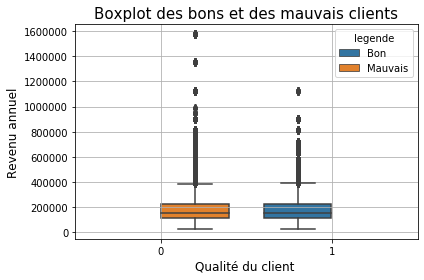

In [12]:
# Réalisons un boxplot :

# Le sample :

sample_0 = credit.loc[:,[Variable,"Qualite_client"]]

# Légende :

sample_0["legende"] = ""
sample_0.loc[sample_0["Qualite_client"] == 1,"legende"] = "Bon"
sample_0.loc[sample_0["Qualite_client"] == 0,"legende"] = "Mauvais"

# La boite à moustache :

sns.boxplot(x= "Qualite_client", y = Variable, hue = "legende",
            hue_order = ["Bon","Mauvais"],data = sample_0)

plt.title("Boxplot des bons et des mauvais clients", fontsize = 15)
plt.ylabel("Revenu annuel", fontsize = 12)
plt.xlabel("Qualité du client ", fontsize = 12)
plt.grid()
plt.tight_layout()
plt.savefig("Boxplot_"+str(Variable)+".png")
plt.show()

> **Pour ces deux variables, on peut conjecturer que les moyennes des deux échantillons sont  sensiblement égales.**

> Normalité, homoscédasticité et ANOVA des échantillons :

In [13]:
# Testons les hypothèses de normalités : 

# Sample des deux échantillons :

sample_0_0 = sample_0.loc[sample_0["Qualite_client"] == 0,[Variable]]
sample_0_1 = sample_0.loc[sample_0["Qualite_client"] == 1,[Variable]]

from scipy.stats import normaltest
from scipy.stats import levene
import statsmodels.formula.api as ssf
import statsmodels.api as ss


print(normaltest(sample_0_0),"\n")
print(normaltest(sample_0_1),"\n")
print("Observation :",sample_0.shape[0],"\n")

# Homoscédasticité des échantillons 


print(levene(sample_0_0.reset_index()[Variable].values
             ,sample_0_1.reset_index()[Variable].values))

# ANOVA 

Y = sample_0.loc[:,Variable]
X = sample_0.loc[:,"Qualite_client"]
fit = ssf.ols("Y ~ X", data = sample_0).fit()
print(fit.summary())
ss.stats.anova_lm(fit)

NormaltestResult(statistic=array([85552.76200817]), pvalue=array([0.])) 

NormaltestResult(statistic=array([44866.99198402]), pvalue=array([0.])) 

Observation : 219173 

LeveneResult(statistic=73.40689304299637, pvalue=1.061649821531348e-17)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     272.7
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           3.21e-61
Time:                        19:17:22   Log-Likelihood:            -2.8362e+06
No. Observations:              219173   AIC:                         5.672e+06
Df Residuals:                  219171   BIC:                         5.672e+06
Df Model:                           1                                         
Covariance Type:            nonrobust         

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,2.775077e+12,2.775077e+12,272.686726,3.209478e-61
Residual,219171.0,2.230458e+15,1.017679e+10,NaN,NaN


> **Les deux échantillons sont considéré comme non normal.**  
**L'homoscédasticité(variance égale dans les deux échantillons) n'est pas vérifié.**  

> Or l'ANOVA est robuste et l'échantillon est suffisemment grands pour supposer la normalité  comme vérifié.

> On arrive a expliquer presque 0% de la variance avec ce modèle.  
+ La PR(>F) prouve que le modèle est statistiquement significatif.
+ La variable catégorielle est significative.
+ Le R² est quasi nulle.

>On peut donc affirmer que la variable categorielle n'as pas d'influence sur le revenu annuel.
**Connaitre le revenu ne donne pas d'information sur la qualité d'un client.**

## Variables qualitative et qualitative 

In [14]:
# Bibliothèque possédant le programme du calcul du khi² :

import Programme as pr

In [15]:
# Variable :

Variable_qual = 'FLAG_EMAIL'

In [16]:
# Khi² :
# Tableau de contingence ou réel :

Tab_reel_1 = credit[['Qualite_client',Variable_qual]].pivot_table(index = Variable_qual,
                                                 columns = ['Qualite_client'],
                                                 aggfunc = len, 
                                                margins = True, 
                                                margins_name = 'Total')

# Tableau théorique + mesure + khi2 : 

Tab_theorique,ecart,khi2_1 = pr.Khi2_independance(Tab_reel_1)

print("Tableau des valeurs réel :\n",Tab_reel_1,"\n")
print("Tableau des valeurs théoriques :\n",Tab_theorique,"\n")
print("Khi2 :",khi2_1)

Tableau des valeurs réel :
 Qualite_client       0       1   Total
FLAG_EMAIL                            
0               108408   92184  200592
1                10446    8135   18581
Total           118854  100319  219173 

Tableau des valeurs théoriques :
 Qualite_client             0             1     Total
FLAG_EMAIL                                          
0               108777.82194   91814.17806  200592.0
1                10076.17806    8504.82194   18581.0
Total           118854.00000  100319.00000  219173.0 

Khi2 : 32.4016265667117


> On observe un khi² de `32.4`, qu'on va comparer avec la valeur de la table du khi²  d'indépendance. Pour ce faire on doit connaitre le degrés de liberté :
+ ddl = (Nombre de ligne - 1) x (Nombre de colonne - 1)
+ Soit ddl : 1x1 = 1 ddl

> Dans la table pour α = 5%, on a 5% de chance que notre khi² dépasse 3.84 et 95% de chance  
qu'il soit inférieur.  
**Le khi² dépasse le seuil donc on peut rejetter l'hypothèse nulle et accepter  
H1 : les variables sont corréllés.**

>**On conclut que si un client possède une adresse mail influence le faite que ce soit un bon  
client.**

# Analyse multivarié

## Visualisation des données 

>Pour visualiser les données on va réaliser des projections sur un espace factoriel.  
Sachant que l'on a des variables qualitatives et quantitatives, l'application de l'analyse  
en composante principale ou l'analyse des corresondances multiples risque de ne pas suffire.

>**Nous allons donc utiliser l'AFDM ou l'analyse factoriel avec données mixtes :**
+ Normaliser les variables quantitatives ( centrer et réduire )
+ Normaliser les variables qualitatives par pondération des moyennes

>Transformons les variables categorielles en numérique :

In [17]:
Liste_OCCUPATION_TYPE = pd.DataFrame({'Name':credit.OCCUPATION_TYPE.unique(),
                                      'Code':range(19)})

Liste_NAME_INCOME_TYPE = pd.DataFrame({'Name':credit.NAME_INCOME_TYPE.unique(),
                                      'Code': range(5)})

Liste_NAME_EDUCATION_TYPE = pd.DataFrame({'Name':credit.NAME_EDUCATION_TYPE.unique(),
                                      'Code': range(5)})

Liste_NAME_FAMILY_STATUS = pd.DataFrame({'Name':credit.NAME_FAMILY_STATUS.unique(),
                                      'Code': range(5)})

Liste_NAME_HOUSING_TYPE = pd.DataFrame({'Name':credit.NAME_HOUSING_TYPE.unique(),
                                      'Code': range(6)})

Liste_CODE_GENDER = pd.DataFrame({'Name':credit.CODE_GENDER.unique(),
                                      'Code': range(2)})

Liste_FLAG_OWN_CAR = pd.DataFrame({'Name':credit.FLAG_OWN_CAR.unique(),
                                      'Code': range(2)})

Liste_FLAG_OWN_REALTY = pd.DataFrame({'Name':credit.FLAG_OWN_REALTY.unique(),
                                      'Code': range(2)})

In [18]:
Liste_OCCUPATION_TYPE.to_csv("Occupation", header = True, index = False)
Liste_NAME_FAMILY_STATUS.to_csv("Family", header = True, index = False)

In [19]:
credit.OCCUPATION_TYPE.replace(credit.OCCUPATION_TYPE.unique(),range(19),inplace = True)
credit.NAME_INCOME_TYPE.replace(credit.NAME_INCOME_TYPE.unique(),range(5), inplace = True)
credit.NAME_EDUCATION_TYPE.replace(credit.NAME_EDUCATION_TYPE.unique(),range(5),inplace = True)
credit.NAME_FAMILY_STATUS.replace(credit.NAME_FAMILY_STATUS.unique(),range(5),inplace = True)
credit.NAME_HOUSING_TYPE.replace(credit.NAME_HOUSING_TYPE.unique(),range(6),inplace = True)
credit.CODE_GENDER.replace(credit.CODE_GENDER.unique(),range(2),inplace = True)
credit.FLAG_OWN_CAR.replace(credit.FLAG_OWN_CAR.unique(),range(2),inplace = True)
credit.FLAG_OWN_REALTY.replace(credit.FLAG_OWN_REALTY.unique(),range(2),inplace = True)

In [20]:
# Centrer et réduire les données :

from sklearn import preprocessing
sc = preprocessing.StandardScaler()
Vizua = credit.iloc[:,1:-3].drop_duplicates()

# Standadisation des variables quantitatives :

viz_quant = Vizua.loc[:,['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED'
             ,'CNT_FAM_MEMBERS']] 
viz_quant = sc.fit_transform(viz_quant)
Vizua.loc[:,['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED'
             ,'CNT_FAM_MEMBERS']] = viz_quant


# standadisation des variables qualitatives :

viz_qual = {}
def pondere(serie):
    x = serie
    n = serie.shape[0]
    name = serie.name
    
    return x/np.sqrt(np.mean(x))

temp = Vizua.iloc[:,[0,1,2,5,6,7,8,11,12,13,14,15]]

for i in range(12):
    viz_qual[temp.iloc[:,i].name] = pondere(temp.iloc[:,i])

Vizua.iloc[:,[0,1,2,5,6,7,8,11,12,13,14,15]] = pd.DataFrame(viz_qual)
Vizua.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.000000,0.000000,0.0,-0.557929,2.459112,0.000000,0.000000,0.000000,0.000000,-0.955979,0.450783,1.0,2.124946,0.00000,0.000000,0.000000,-0.201215
16,0.000000,0.000000,0.0,-0.557929,-0.698514,0.000000,1.112619,0.877752,0.930377,1.302854,0.426359,1.0,0.000000,0.00000,0.000000,0.504539,-0.201215
46,1.244452,1.263163,0.0,-0.557929,0.880299,1.122726,1.112619,1.755505,0.930377,0.781585,0.439928,1.0,0.000000,1.85604,3.348749,1.009079,-1.266168
51,1.244452,1.263163,0.0,-0.557929,1.015626,2.245451,0.000000,2.633257,0.930377,1.563489,-2.295588,1.0,0.000000,0.00000,0.000000,0.000000,-1.266168
68,0.000000,0.000000,0.0,-0.557929,0.880299,0.000000,0.000000,0.877752,0.930377,0.260316,0.423645,1.0,2.124946,1.85604,3.348749,1.513618,-0.201215


In [21]:
# Appliquons maintenant le PCA grace a l'API prince:

import prince

pca = prince.PCA(
     n_components=6,
     n_iter=3,
     rescale_with_mean=False,
     rescale_with_std=False,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )
pca = pca.fit(Vizua)

No handles with labels found to put in legend.


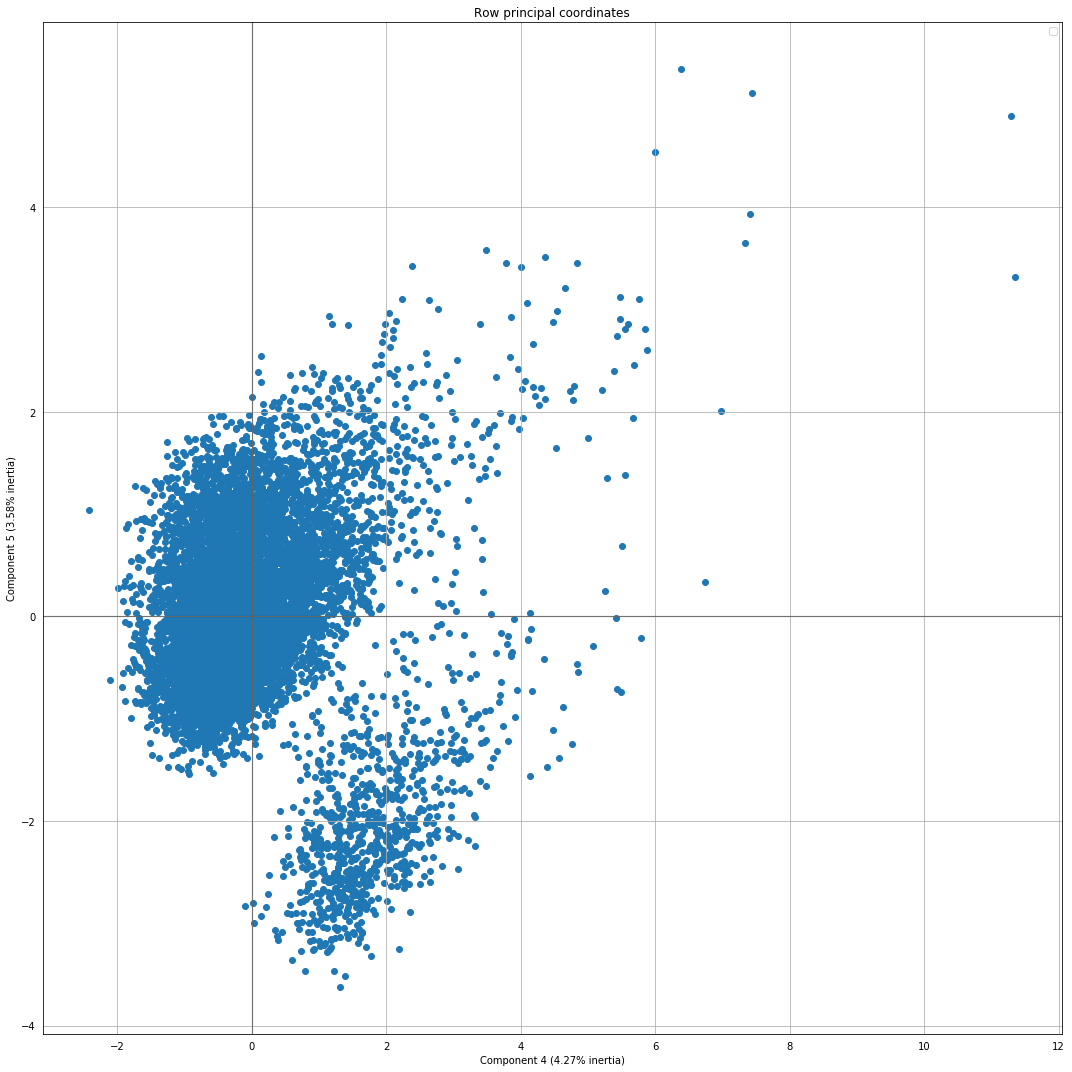

In [22]:
ax = pca.plot_row_coordinates(
     Vizua,
     ax=None,
     figsize=(15, 15),
     x_component=4,
     y_component=5,
     labels=None,
     color_labels=None,
     ellipse_outline=False,
     ellipse_fill=False,
     show_points=True
 )
plt.tight_layout()
plt.savefig("AFDM fact 4-5")
plt.show()

> L'AFDM nous permet de voir les données dans les axes factoriels.

In [23]:
pca.column_correlations(Vizua)

,0,1,2,3,4,5
AMT_INCOME_TOTAL,-0.001890,0.159446,-0.085001,0.110106,0.832820,0.374679
CNT_CHILDREN,0.069389,0.477267,0.815752,0.166795,-0.014067,-0.024578
CNT_FAM_MEMBERS,-0.008158,0.506095,0.817933,0.230645,-0.039594,0.048174
CODE_GENDER,0.125911,-0.215637,0.025366,0.069271,-0.201764,-0.158538
DAYS_BIRTH,-0.211518,-0.645245,-0.163492,0.366904,-0.123878,0.199283
DAYS_EMPLOYED,0.355668,0.795223,-0.109592,-0.345949,0.099372,-0.044222
FLAG_EMAIL,0.067577,0.066086,-0.001158,-0.043548,0.542114,-0.613787
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,0.128885,-0.215162,-0.013605,-0.042223,-0.240020,-0.189978
FLAG_OWN_REALTY,0.135476,0.022574,0.076061,-0.348463,-0.039013,0.197969


In [24]:
# Correlation des variable :
print(pca.column_correlations(Vizua),'\n')

# Racine valeur propres corrigé :
vp_corr = np.sqrt(pca.eigenvalues_)
print(vp_corr,'\n')

# correlation variables 
corvar = pca.column_correlations(Vizua)*vp_corr

                            0         1         2         3         4  \
AMT_INCOME_TOTAL    -0.001890  0.159446 -0.085001  0.110106  0.832820   
CNT_CHILDREN         0.069389  0.477267  0.815752  0.166795 -0.014067   
CNT_FAM_MEMBERS     -0.008158  0.506095  0.817933  0.230645 -0.039594   
CODE_GENDER          0.125911 -0.215637  0.025366  0.069271 -0.201764   
DAYS_BIRTH          -0.211518 -0.645245 -0.163492  0.366904 -0.123878   
DAYS_EMPLOYED        0.355668  0.795223 -0.109592 -0.345949  0.099372   
FLAG_EMAIL           0.067577  0.066086 -0.001158 -0.043548  0.542114   
FLAG_MOBIL                NaN       NaN       NaN       NaN       NaN   
FLAG_OWN_CAR         0.128885 -0.215162 -0.013605 -0.042223 -0.240020   
FLAG_OWN_REALTY      0.135476  0.022574  0.076061 -0.348463 -0.039013   
FLAG_PHONE           0.121728 -0.055914  0.054207 -0.259006  0.053139   
FLAG_WORK_PHONE      0.200710  0.202491  0.066279 -0.490678 -0.094793   
NAME_EDUCATION_TYPE  0.057068 -0.090949  0.058078 -

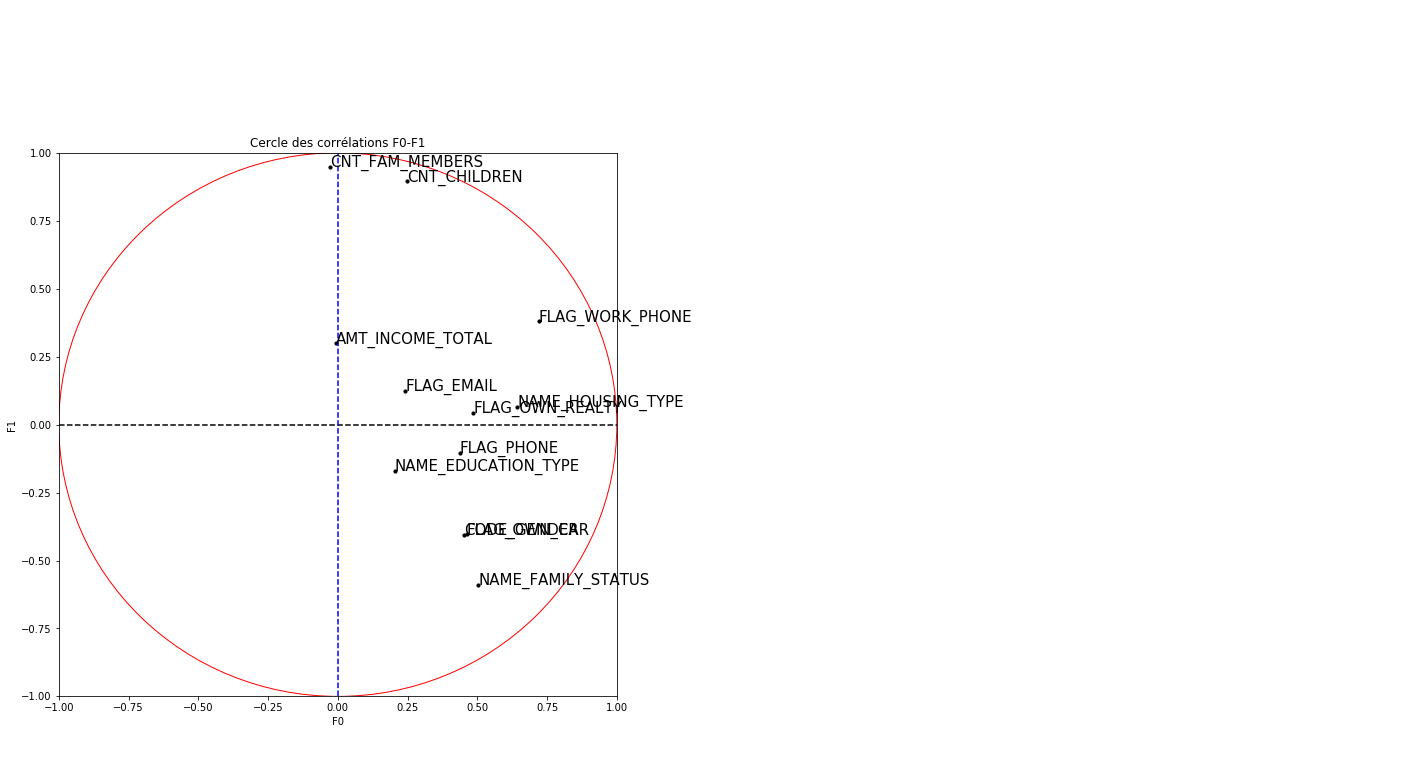

In [25]:
# Réalisez le cercle 

fig, axes = plt.subplots(figsize = (10,10))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Placer les etiquettes des variables 

for i in range(corvar.shape[0]):
    plt.annotate(corvar.index[i],(corvar.iloc[i,0],corvar.iloc[i,1]),fontsize = 15)
    plt.scatter(corvar.iloc[i,0],corvar.iloc[i,1], c = "black",s = 10)
    
# Mettre les axes 

plt.plot([-1,1],[0,0],linestyle = "--", color = "black")
plt.plot([0,0],[-1,1],linestyle = "--", color = 'blue')

# mettre le cercle 

axes.add_artist(plt.Circle((0,0),1,color = "red",fill = False))

plt.xlabel("F0")
plt.ylabel("F1")
plt.title("Cercle des corrélations F0-F1")
plt.tight_layout()
plt.savefig("Cercle des corrélations F0-F1.png")

plt.show()

>Sur le premier axe factoriel, on peut voir que :
+ `CNT_FAM_MEMBERS` et `CNT_CHILDREN` sont bien représenté et sont corrélé à F2
+ Plusieurs variables sont corrélé a F1 tel que `FLAG_WORK_PHONE` 0.7 

## Split des données 

In [26]:
Donnee = credit[["ID","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY",
                 "CNT_CHILDREN","AMT_INCOME_TOTAL","NAME_INCOME_TYPE",
                 "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE",
                 "DAYS_BIRTH","DAYS_EMPLOYED","OCCUPATION_TYPE","CNT_FAM_MEMBERS"]].set_index('ID')

In [27]:
Y = credit.Qualite_client
X = Donnee
label = Donnee.columns
ID = Donnee.index

In [28]:
from sklearn import model_selection

Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(X,Y,test_size = 0.3, 
                                                             random_state = 0)

## Choix des variables significative 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(penalty = "none")
selection = RFE(estimator = lr)
solution = selection.fit(Xtrain,Ytrain)

# nombre de variable selectionner 
print("Variable selectionné :",solution.n_features_,"\n")

# Variable selectionné
print(Xtrain.columns[solution.support_],"\n")

# Ordre de suppression 
print(Xtrain.columns,"\n")
print(solution.ranking_)

Variable selectionné : 6 

Index(['AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object') 

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object') 

[6 7 3 2 1 5 8 1 4 1 1 1 1]


In [30]:
# Choix des variables significatives

Xtrain = Xtrain.loc[:,solution.support_]
Xtest = Xtest.loc[:,solution.support_]

## Test de modèle

In [31]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics




models = {}
models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
models['bayes'] = GaussianNB()
models['rdm'] = RandomForestClassifier()
models['lgc'] = LogisticRegression(max_iter=1000)
models['ada'] = AdaBoostClassifier()
models['gda'] = GradientBoostingClassifier()
models['bca'] = BaggingClassifier()

In [32]:
for name, model in models.items():
    model.fit(Xtrain, Ytrain)
    Y_pred_test = model.predict(Xtest)
    accuracy = accuracy_score(Ytest,Y_pred_test)
    
    print(name, accuracy,"\n")
    print(metrics.confusion_matrix(Ytest,Y_pred_test),"\n")
    print(metrics.classification_report(Ytest,Y_pred_test),"\n\n")

knn 0.9635752524638034 

[[34467  1291]
 [ 1104 28890]] 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     35758
           1       0.96      0.96      0.96     29994

    accuracy                           0.96     65752
   macro avg       0.96      0.96      0.96     65752
weighted avg       0.96      0.96      0.96     65752
 


cart 0.9715902177880521 

[[34793   965]
 [  903 29091]] 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35758
           1       0.97      0.97      0.97     29994

    accuracy                           0.97     65752
   macro avg       0.97      0.97      0.97     65752
weighted avg       0.97      0.97      0.97     65752
 


bayes 0.5381737437644483 

[[29624  6134]
 [24232  5762]] 

              precision    recall  f1-score   support

           0       0.55      0.83      0.66     35758
           1       0.48      0.19      0.28     29994


> On remarque que les modèles suivant sont meilleurs :
+ knn
+ cart
+ rdm

> On décide de traiter les 3 modèles et de les comparer pour ne garder que le meilleur.

## Modèle KNN

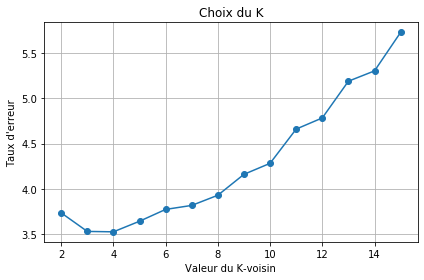

In [33]:
from sklearn.neighbors import KNeighborsClassifier
error = []

for i in range(2,16):
    KNN_model = KNeighborsClassifier(i).fit(Xtrain,Ytrain)
    error.append(100*((1 - KNN_model.score(Xtest,Ytest))))


plt.title("Choix du K")
plt.plot(range(2,16),error,'o-')
plt.xlabel("Valeur du K-voisin")
plt.ylabel("Taux d'erreur")
plt.grid()
plt.tight_layout()
plt.savefig("Choix de l'hyperparamettre des KNN.png")
plt.show()

> Au vue de du test on choisit un K = 3 

In [34]:
KNN_model = KNeighborsClassifier(3).fit(Xtrain,Ytrain)
KNN_Y = KNN_model.predict(Xtest)
print(metrics.classification_report(Ytest,KNN_Y))
print(KNN_model.score(Xtest,Ytest))
print(metrics.confusion_matrix(Ytest,KNN_Y))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     35758
           1       0.96      0.97      0.96     29994

    accuracy                           0.96     65752
   macro avg       0.96      0.96      0.96     65752
weighted avg       0.96      0.96      0.96     65752

0.9647006935150262
[[34422  1336]
 [  985 29009]]


## Modèle DecisionTreeClassifier

from sklearn import tree

param = {'max_depth':list(range(1,60)),
         'min_samples_split':[2,3,5,10,15,20]}

grid = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                    param_grid=param, scoring = 'accuracy')
grid.fit(Xtrain,Ytrain)
print(grid.best_params_)
print(grid.best_score_)

> On s'aperçoit que il faut un seuil de 58 de profondeur pour avoir le meilleur modele  
avec un nombre minimal de 3 échantillons dans un noeud.  

In [35]:
from sklearn import tree
DTC_model = tree.DecisionTreeClassifier(max_depth = 58, min_samples_split = 3)
DTC_model.fit(Xtrain,Ytrain)
DTC_Y = DTC_model.predict(Xtest)
print(metrics.classification_report(Ytest,DTC_Y))
print(metrics.confusion_matrix(Ytest,DTC_Y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35758
           1       0.97      0.97      0.97     29994

    accuracy                           0.97     65752
   macro avg       0.97      0.97      0.97     65752
weighted avg       0.97      0.97      0.97     65752

[[34793   965]
 [  903 29091]]


## RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC_model = RFC.fit(Xtrain,Ytrain)
Y_RFC = RFC_model.predict(Xtest)
print(metrics.classification_report(Ytest,Y_RFC))
print(metrics.confusion_matrix(Ytest,Y_RFC))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     35758
           1       0.97      0.97      0.97     29994

    accuracy                           0.97     65752
   macro avg       0.97      0.97      0.97     65752
weighted avg       0.97      0.97      0.97     65752

[[34719  1039]
 [  841 29153]]


## Extreme GradientBoosting

In [37]:
import xgboost as xgb

data_DMatrix = xgb.DMatrix(data = X,label = Y)

> Instruction :  
**learning_rate** : rétrécissement de la taille du pas utilisé pour éviter l'overfitting.  
La plage est [0,1].
>**max_depth** : détermine la profondeur à laquelle chaque arbre est autorisé à croître pendant un tour de boosting.  
**subsample**: pourcentage d'échantillons utilisés par arbre. Une valeur faible peut conduire à un sous-ajustement.  
**colsample_bytree** : pourcentage de caractéristiques utilisées par arbre. Une valeur élevée peut conduire à un surajustement.  
**n_estimateurs** : nombre d'arbres à construire.  
**objective** : détermine la fonction de perte à utiliser comme :  
+ **reg:linear** pour les problèmes de régression,  
+ **reg:logistic** pour les problèmes de classification avec seulement décision,  
+ **binary:** logistic pour les problèmes de classification avec probabilité.  

>XGBoost supporte également des paramètres de régularisation pour pénaliser les modèles lorsqu'ils deviennent plus complexes et les réduire à des modèles simples (parcimonieux).  
**gamma :** contrôle si un nœud donné sera divisé en fonction de la réduction attendue de la perte après la division. Une valeur plus élevée conduit à moins de scissions. Pris en charge uniquement pour les apprenants basés sur les arbres.  
**alpha :** Régularisation L1 sur les poids des feuilles. Une grande valeur entraîne une plus grande régularisation.  
**lambda :** Régularisation L2 sur les poids des feuilles et est plus lisse que la régularisation L1.
Il est également intéressant de mentionner que, bien que vous utilisiez des arbres comme apprenants de base, vous pouvez également utiliser les apprenants de base linéaires relativement moins populaires de XGBoost et un autre apprenant d'arbre connu sous le nom de dart. Tout ce que vous avez à faire est de régler le paramètre booster sur gbtree (par défaut), gblinear ou dart.

In [38]:
param_xgb = {'objective':['reg:logistic'],
            'max_depth':[41,58],
            'learning_rate':[0.1,0.5]}
xgb_class = xgb.XGBClassifier()
grid_xgb = model_selection.GridSearchCV(xgb_class,param_grid = param_xgb,
                                       scoring = 'accuracy')
grid_xgb.fit(Xtrain,Ytrain)
print(pd.DataFrame.from_dict(grid_xgb.cv_results_).loc[:,["params","mean_test_score"]])

                                              params  mean_test_score
0  {'learning_rate': 0.1, 'max_depth': 41, 'objec...         0.969769
1  {'learning_rate': 0.1, 'max_depth': 58, 'objec...         0.969750
2  {'learning_rate': 0.5, 'max_depth': 41, 'objec...         0.969769
3  {'learning_rate': 0.5, 'max_depth': 58, 'objec...         0.969880


>On voit que le `best_param` est :
+ `max_depth` = 58
+ `learning_rate` = 0.5

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     35758
           1       0.97      0.97      0.97     29994

    accuracy                           0.97     65752
   macro avg       0.97      0.97      0.97     65752
weighted avg       0.97      0.97      0.97     65752
 

[[34735  1023]
 [  847 29147]]


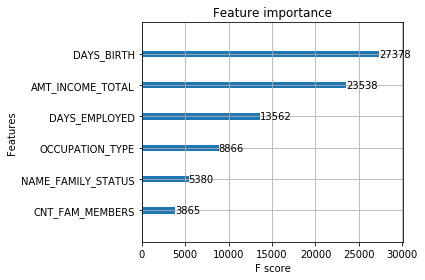

In [39]:
xgb_class = xgb.XGBClassifier(objective = 'reg:logistic',max_depth = 58,learning_rate = 0.5,
                             random_state = 0)
xgb_class.fit(Xtrain,Ytrain)
Y_xgb = xgb_class.predict(Xtest)
print(metrics.classification_report(Ytest,Y_xgb),'\n')
print(metrics.confusion_matrix(Ytest,Y_xgb))

xgb.plot_importance(xgb_class)
plt.tight_layout()
plt.savefig("Importance_feature_xgb")
plt.show()

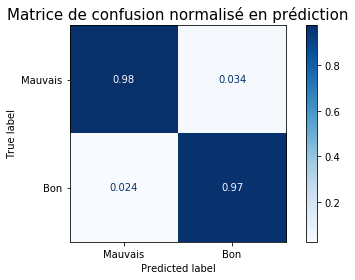

In [40]:
plot_confusion_matrix(xgb_class,Xtest,Ytest,normalize = 'pred',
                     display_labels = ["Mauvais","Bon"],
                     cmap = plt.cm.Blues).ax_.set_title(
    "Matrice de confusion normalisé en prédiction",fontsize = 15)
plt.tight_layout()
plt.savefig("Matrice de confusion.png")
plt.show()

## Procédure de validation

>**Coeficient de détermination :**
+ R² = 1 - ( somme(ytest - ypred) / somme(ytest - moy(ytest) ) )
+ c'est la variance expliqué par le modèle
+ proche de 1 bon modele 
+ proche de 0 mauvais modèle

>**Le biais :**
+ Biais = somme(ypred - ytest) / n
+ proche de 0 , bonne prédiction 
+ Voir si le modèle est sous ou sur estimé ( bissectrice )

>**Erreur moyenne absolu MAE :**
+ MAE = somme( abs(ypred - ytest) ) / n
+ meilleurs indicateur de prédiction 
+ Ne peut pas connaitre le sur ou sous ajustement

>**Erreur quadratique moyenne RMSE :**
+ RMSE = racine( somme ( ( ypred - ytest )² ) / n )
+ Elle représente la variance du modèle
+ Normalisé elle est un indicateur puissant
+ On compare le RMSE du modèle a la moyenne des observations 

In [41]:
pred_model = {}
pred_model['knn'] = KNeighborsClassifier(3).fit(Xtrain,Ytrain).predict(Xtest)
pred_model["dtc"] = tree.DecisionTreeClassifier(max_depth = 58, min_samples_split = 3).fit(Xtrain,Ytrain).predict(Xtest)
pred_model["rfc"] = RandomForestClassifier().fit(Xtrain,Ytrain).predict(Xtest)
pred_model["xgb"] = xgb.XGBClassifier(objective = 'reg:logistic',max_depth = 58,learning_rate = 0.5,random_state = 0).fit(Xtrain,Ytrain).predict(Xtest)

In [42]:
# Rappel, specification, precision :

mesure = {}
for name, p in pred_model.items():
    tn,fp,fn,tp = metrics.confusion_matrix(Ytest,p).ravel()
    mesure[name] = [tp/(tp+fn),tp/(tp+fp),tn/(tn+fp)]
    
Mesure = pd.DataFrame(mesure)
Mesure.rename(index = {0:'Rappel',1:'Precision',2:'Specification'}, inplace = True)
Mesure

,knn,dtc,rfc,xgb
Rappel,0.967160,0.969894,0.970494,0.971761
Precision,0.955973,0.967893,0.967655,0.966092
Specification,0.962638,0.973013,0.972789,0.971391


In [43]:
auc = {}
auc['knn'] = metrics.roc_auc_score(Ytest, pred_model['knn'])
auc['dtc'] = metrics.roc_auc_score(Ytest, pred_model['dtc'])
auc['rfc'] = metrics.roc_auc_score(Ytest, pred_model['rfc'])
auc['xgb'] = metrics.roc_auc_score(Ytest, pred_model['xgb'])

auc

{'knn': 0.9648989150515749,
 'dtc': 0.9714535054222657,
 'rfc': 0.9716417023546775,
 'xgb': 0.9715760181325748}

>Rappel :
+ Rappel = tp / (tp + fn)
+ Precision = tp / (tp + fp)
+ Specification = tn / (tn + fp)

In [44]:
# RMSE : erreur quadratique moyenne 
from sklearn.metrics import mean_squared_error

rm = {}
rm['knn'] = np.sqrt(mean_squared_error(Ytest, pred_model['knn']))
rm['dtc'] = np.sqrt(mean_squared_error(Ytest, pred_model['dtc']))
rm['rfc'] = np.sqrt(mean_squared_error(Ytest, pred_model['rfc']))
rm['xgb'] = np.sqrt(mean_squared_error(Ytest, pred_model['xgb']))

rm

{'knn': 0.18788109666747702,
 'dtc': 0.16855201633901604,
 'rfc': 0.16810025456079566,
 'xgb': 0.1686422234722273}

In [45]:
# MAE : erreur moyenne absolue

mae ={}

mae['knn'] = np.sum( np.abs( pred_model['knn'] - Ytest)) / Ytest.shape[0]
mae['dtc'] = np.sum( np.abs( pred_model['dtc'] - Ytest)) / Ytest.shape[0]
mae['rfc'] = np.sum( np.abs( pred_model['rfc'] - Ytest)) / Ytest.shape[0]
mae['xgb'] = np.sum( np.abs( pred_model['xgb'] - Ytest)) / Ytest.shape[0]

mae

{'knn': 0.03529930648497384,
 'dtc': 0.028409782211947926,
 'rfc': 0.028257695583404307,
 'xgb': 0.028440199537656648}

In [46]:
# Le biais :

biais = {}

biais['knn'] = np.sum( pred_model['knn'] - Ytest) / Ytest.shape[0]
biais['dtc'] = np.sum( pred_model['dtc'] - Ytest) / Ytest.shape[0]
biais['rfc'] = np.sum( pred_model['rfc'] - Ytest) / Ytest.shape[0]
biais['xgb'] = np.sum( pred_model['xgb'] - Ytest) / Ytest.shape[0]

biais

{'knn': 0.005338240661881008,
 'dtc': 0.0009429370969704343,
 'rfc': 0.0013383623311838423,
 'xgb': 0.0026767246623676847}

In [47]:
# R² :

r2 = {}

r2['knn'] = 1 - np.sum( (pred_model['knn'] - Ytest)**2) / np.sum( (Ytest - np.mean(Ytest))**2)
r2['dtc'] = 1 - np.sum( (pred_model['dtc'] - Ytest)**2) / np.sum( (Ytest - np.mean(Ytest))**2)
r2['rfc'] = 1 - np.sum( (pred_model['rfc'] - Ytest)**2) / np.sum( (Ytest - np.mean(Ytest))**2)
r2['xgb'] = 1 - np.sum( (pred_model['xgb'] - Ytest)**2) / np.sum( (Ytest - np.mean(Ytest))**2)

r2

{'knn': 0.8577093049722796,
 'dtc': 0.8854808193400336,
 'rfc': 0.8860938770523461,
 'xgb': 0.8853582077975712}

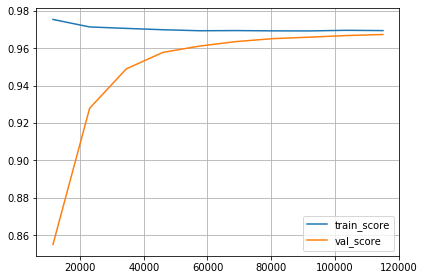

In [48]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(xgb_class, Xtrain, Ytrain, cv = 4,
                                          scoring = 'f1',
                                          train_sizes = np.linspace(0.1, 1, 10))
plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
plt.plot(N, val_score.mean(axis = 1), label = 'val_score')
plt.grid()
plt.tight_layout()
plt.legend()

plt.savefig("Learning curve xgb.png")
plt.show()

# Prédiction 

In [49]:
# Appliquons les mêmes transformations sur la data de base que celle de travail :
Info = Info.reset_index()
Info.loc[:,"DAYS_BIRTH"] = np.round(np.abs(Info.loc[:,"DAYS_BIRTH"]/365).astype(int) )
Info.loc[:,'DAYS_EMPLOYED'] = np.round((-1)*(Info.loc[:,'DAYS_EMPLOYED'] / 365).astype(int) )

Info.OCCUPATION_TYPE.replace(Info.OCCUPATION_TYPE.unique(),range(19),inplace = True)
Info.NAME_INCOME_TYPE.replace(Info.NAME_INCOME_TYPE.unique(),range(5), inplace = True)
Info.NAME_EDUCATION_TYPE.replace(Info.NAME_EDUCATION_TYPE.unique(),range(5),inplace = True)
Info.NAME_FAMILY_STATUS.replace(Info.NAME_FAMILY_STATUS.unique(),range(5),inplace = True)
Info.NAME_HOUSING_TYPE.replace(Info.NAME_HOUSING_TYPE.unique(),range(6),inplace = True)
Info.CODE_GENDER.replace(Info.CODE_GENDER.unique(),range(2),inplace = True)
Info.FLAG_OWN_CAR.replace(Info.FLAG_OWN_CAR.unique(),range(2),inplace = True)
Info.FLAG_OWN_REALTY.replace(Info.FLAG_OWN_REALTY.unique(),range(2),inplace = True)

In [50]:
Xtrain.columns

Index(['AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [51]:
Set = Info.loc[:,['ID','AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']]
X = Set.iloc[:,1::]
xgb_class.fit(Xtrain,Ytrain)
Y = xgb_class.predict(X)
Info['Prediction'] = Y
Info.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Prediction
0,5008804,0,0,0,0,427500.0,0,0,0,0,32,12,1,1,0,0,0,2.0,0
1,5008806,0,0,0,0,112500.0,0,1,1,1,58,3,1,0,0,0,1,2.0,0
2,5008808,1,1,0,0,270000.0,1,1,2,1,52,8,1,0,1,1,2,1.0,0
3,5008812,1,1,0,0,283500.0,2,0,3,1,61,-1000,1,0,0,0,0,1.0,0
4,5008815,0,0,0,0,270000.0,0,0,1,1,46,2,1,1,1,1,3,2.0,0


In [52]:
Info[Info.DAYS_EMPLOYED == -1000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Prediction
3,5008812,1,1,0,0,283500.0,2,0,3,1,61,-1000,1,0,0,0,0,1.0,0
16,5008884,1,1,0,0,315000.0,2,1,4,1,55,-1000,1,0,0,0,0,1.0,1
24,5008974,1,1,0,0,112500.0,2,1,1,1,61,-1000,1,0,0,0,0,2.0,1
34,5009033,1,1,1,0,255150.0,2,2,0,0,51,-1000,1,0,0,0,0,2.0,0
40,5009060,1,1,0,0,94500.0,2,0,1,1,61,-1000,1,0,1,0,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90054,6799007,1,1,1,0,180000.0,2,1,2,1,58,-1000,1,0,0,0,0,1.0,0
90068,6830273,1,1,1,0,360000.0,2,1,1,1,53,-1000,1,0,1,0,0,2.0,1
90075,6836737,1,1,1,0,67500.0,2,1,4,1,59,-1000,1,0,0,0,0,1.0,0
90081,6839651,1,1,0,3,99000.0,2,1,2,1,51,-1000,1,0,0,0,0,1.0,1


In [53]:
sample_test = [5008804,5008808,6836990,5010675,5010647,5008834,5008891,5022077,5022102,6840222]
test = Info.loc[:,['ID','AMT_INCOME_TOTAL','DAYS_BIRTH','Prediction']][Info.ID.isin(sample_test)]
index_test = test.index
test

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,Prediction
0,5008804,427500.0,32,0
2,5008808,270000.0,52,0
8,5008834,112500.0,30,1
18,5008891,297000.0,42,1
315,5010647,112500.0,24,0
320,5010675,225000.0,35,0
557,5022077,90000.0,52,1
560,5022102,94500.0,48,1
90076,6836990,360000.0,44,0
90084,6840222,103500.0,43,1


In [54]:
credit.to_csv(r'decision_credit.csv',index = False, header = True)

# Explication boite noire

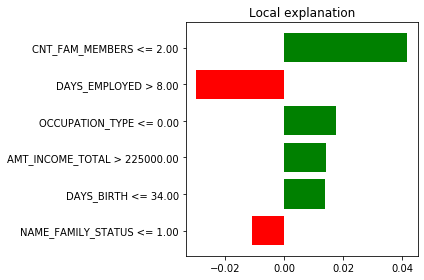

In [55]:
import lime.lime_tabular as llt

classifier_lime = llt.LimeTabularExplainer(Xtrain.values,
                                          mode = 'regression',
                                          #training_labels = None,
                                          feature_names = Xtrain.columns,
                                          random_state = 40)
                                          #categorical_features = ['CHAS'])

lime_results = classifier_lime.explain_instance( X.values[index_test[0]],xgb_class.predict_proba)

lime_results.show_in_notebook(show_table=True, show_all=False)
lime_results.as_pyplot_figure()
plt.tight_layout()

In [56]:
lime_results.as_list()

[('CNT_FAM_MEMBERS <= 2.00', 0.041547321438072216),
 ('DAYS_EMPLOYED > 8.00', -0.029803166493152535),
 ('OCCUPATION_TYPE <= 0.00', 0.017499843758126465),
 ('AMT_INCOME_TOTAL > 225000.00', 0.014230392630192578),
 ('DAYS_BIRTH <= 34.00', 0.013770582266787868),
 ('NAME_FAMILY_STATUS <= 1.00', -0.011012248528839171)]

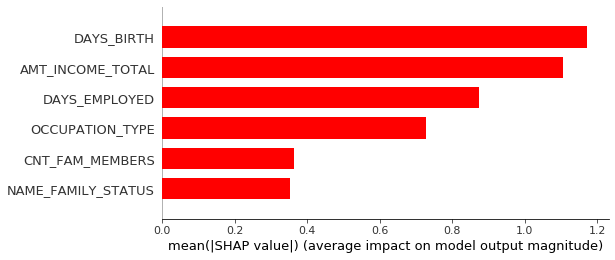

In [57]:
#import shap
import shap

explainer = shap.TreeExplainer(xgb_class)

## Le fichier a été sauvegarder donc ne pas reutiliser cette ligne de code
#shap_value = explainer.shap_values(X)

shap_value = np.loadtxt("shap_value")
shap.summary_plot(shap_value, X, plot_type="bar", color='red')

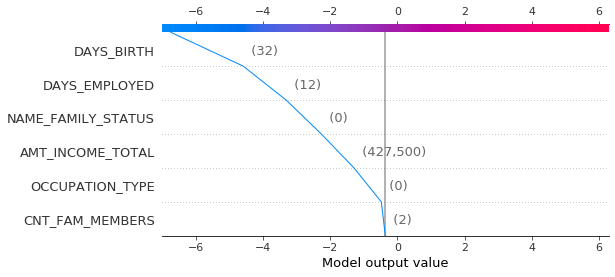

In [221]:
shap.decision_plot(explainer.expected_value,
                shap_value[index_test[0],:], X.iloc[index_test[0],:])


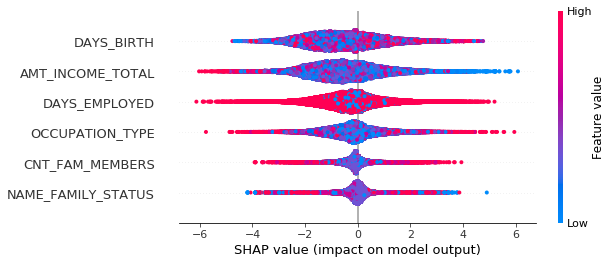

In [59]:
shap.initjs()
shap.summary_plot(shap_value, X)

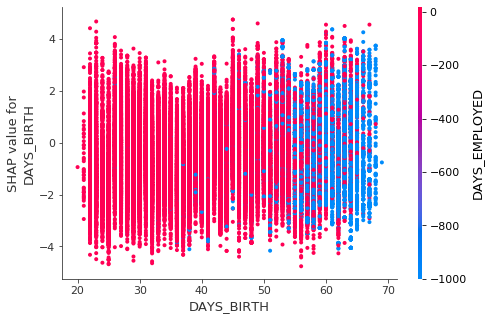

In [60]:
shap.dependence_plot(ind='DAYS_BIRTH', interaction_index='DAYS_EMPLOYED',
                     shap_values=shap_value, 
                     features=X,  
                     display_features=X)

## Dashbord : avec Dash de Plotly 

In [61]:
pd.read_csv("Set.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90085 entries, 0 to 90084
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  90085 non-null  int64  
 1   AMT_INCOME_TOTAL    90085 non-null  float64
 2   NAME_FAMILY_STATUS  90085 non-null  int64  
 3   DAYS_BIRTH          90085 non-null  int64  
 4   DAYS_EMPLOYED       90085 non-null  int64  
 5   OCCUPATION_TYPE     90085 non-null  int64  
 6   CNT_FAM_MEMBERS     90085 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 4.8 MB


In [62]:
# Proba de succes par client :
#prob = xgb_class.predict_proba(X)[:,1]
#Proba = pd.DataFrame({"id": Set.ID,"prob":prob})

# Variable importante par client :
Set.set_index("ID", inplace = True)
Set.to_csv("Set.csv",header = True, index = True)

In [63]:
Z = xgb_class.predict_proba(X)
Z = pd.DataFrame({"Identifiant":Set.index,"Echec":Z[:,0],"Succes": Z[:,1]})
Z.set_index("Identifiant", inplace = True)
Z.columns.name = "Prédiction en pourcentage de/d'"
Z.to_csv("Z.csv",header = True)

In [226]:
Z[(Z.Echec > 0.9)]

,Echec,Succes
Identifiant,,
5008804,0.998830,0.001170
5008806,0.999427,0.000573
5008808,0.987362,0.012638
5008812,0.997705,0.002295
5008815,0.996421,0.003579
...,...,...
6835980,0.996287,0.003713
6836737,0.999571,0.000429
6836990,0.986876,0.013124


In [64]:
Z = pd.read_csv("Z.csv").set_index("Identifiant")
Z

,Echec,Succes
Identifiant,,
5008804,0.998830,0.001170
5008806,0.999427,0.000573
5008808,0.987362,0.012638
5008812,0.997705,0.002295
5008815,0.996421,0.003579
...,...,...
6837707,0.702970,0.297030
6839651,0.002812,0.997188
6839917,0.999777,0.000223


In [215]:
import dash
import dash_core_components as comp
import dash_html_components as html
import dash_shap_components as dsc
import dash_table
import plotly.express as px
from dash.dependencies import Output, Input, State
import shap
from shap.plots._force_matplotlib import draw_additive_plot
import base64
global client 

Z = pd.read_csv("Z.csv").set_index("Identifiant")
Set = pd.read_csv("Set.csv")
encoded_image = base64.b64encode(open(os.path.join(os.getcwd(), 'Importance_feature_xgb.png')
                                      , 'rb').read())
Comm = pd.DataFrame({"ID":Set.ID,"Commentaire":range(0,Set.shape[0])})
Comm.Commentaire = ""
Comm.Commentaire[0] = "Commentaire test du client 5008804"
client = ""

Support = dash.Dash()

Support.layout = html.Div( 
    children=[
        html.Div(
            children=[
                html.P(children= "🏦",className = 'header-emoji'),
                html.H1( children = "Customer information",className="header-title"),
                html.P( children = "Informations d'aide à la prise de décision. Ce programme est conçu sur le modèle XGBoost.",
                       className = "header-paragraph")
            ],
            className="header",
        ),
        html.Div(
            children=[
                html.Div(children="Identifiant", className = "Identifiant"),
                comp.Dropdown( id = "Id_client",
                              options=[
                                  {"label": id_, "value": id_}
                                  for id_ in np.sort(Set.ID.unique())
                              ],
                              value = "5008804",
                              clearable = False,
                              )
            ],className = "Dropdown"
        ),
        html.Br(),
        html.Div(children=[
            dash_table.DataTable(
                id='table',
                columns=[],
                data=[],
                style_header={'backgroundColor': 'rgb(30, 30, 30)','color': 'white'},
                style_cell={
                    'backgroundColor': '#F7F7F7',
                    'color': 'black'}
            )
        ]
                ),
        html.Div(children=[
            html.Img(src='data:image/png;base64,{}'.format(encoded_image),
                    alt ='Pas de IMAGE')
        ],className = "Image"
                ),
        html.Div(children=[
            comp.Graph(id = "Probabilite",className = "graph"),
            html.Div(children=[
                comp.Markdown(children = [
                    '''
                    ### Informations utiles  

                    Voici quelques informations pour une utilisation optimal de l'application :  
                    + L'`ID` sera toujours composé de 7 chiffres.
                    + `DAYS_EMPLOYED` est le nombre d'année de travail consécutifs à ce jours.  
                    Une valeur de -1000, signifie que le client est au chômage.
                    + `OCCUPATION_TYPE` est le type de proffession du client.  
                    Une valeur de 0,signifie que le type de proffession n'est pas spécifié.  

                    #### Vous pouvez laissez un commentaire pour vous souvenir d'une remarque.
                    #### Ce commentaire peut servir a d'autre fins.
                    '''],className = 'texte'),
                comp.Textarea(
                    id='textarea-entrer',
                    value='',
                    placeholder= "Entrez un commentaire",
                    persistence=True, persistence_type='local',
                    className = 'Textearea'
                ),
                html.Button('Entrez', id='button', n_clicks=0,className='Button'),
                html.Div(id="textarea-sorti"),
                html.Div(id='commsave')
            ],className = 'Commentaire'
                    )
        ],className = "Graph"
                )
    ]
)



##-------------------------------------------------------------------------------------------------------##
                             ### Appel des fonctions de mise à jour ###
    
    
    
@Support.callback(
    [
        Output("table", "data"),
        Output("table",'columns'),
        Output("Probabilite","figure"),
        Output("commsave","children")
    ],
    [Input("Id_client", "value")])

def updating(id_):
    mask = (Set.ID == id_)
    filtered_data = Set.loc[mask,:]
    col = [{"name": i, "id": i} for i in filtered_data.columns]
    rows = filtered_data.to_dict('records')
    fig = px.pie(data_frame = Z,
                 names = ['Succes','Echec'],
                 values = [Z.loc[int(id_),"Succes"],Z.loc[int(id_),"Echec"]],
                 color_discrete_map = ['darkcyan','darkred'],
                 title = "Probabilité d'échec et de succès du client")
    com_ = Comm.iloc[int(Comm[Comm.ID == int(id_)].index.values),1]
    return rows,col,fig,com_


    
@Support.callback(
        Output("textarea-sorti","children"),
        Input("button","n_clicks"),
        Input("textarea-entrer","value"),
        State("Id_client","value")
)

def Zone_text(n_clicks,value,id_):
    if n_clicks > 0:
        Comm.iloc[int(Comm[Comm.ID == int(id_)].index.values),1] = value
        return "Commentaire :"+value

##-------------------------------------------------------------------------------------------------------##
                             ### Lancement du programme ###
    

    
if __name__ == "__main__":
    Support.run_server(debug= True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

In [189]:
ind = Comm[Comm.ID == 5008804].index.values
ind = int(ind)
Comm.iloc[ind,1]

'Commentaire test du client 5008804'

In [220]:
comp.

In [128]:
str(Comm.loc[Comm.ID == 5008804,"Commentaire"].values)

"['fou loulou']"

In [76]:
Comm = pd.DataFrame({"ID":Set.ID,"Commentaire":range(0,Set.shape[0])})
Comm.Commentaire = ""
Comm.Commentaire[0] = "Commentaire test du client 5008804"
Comm

,ID,Commentaire
0,5008804,Commentaire test du client 5008804
1,5008806,
2,5008808,
3,5008812,
4,5008815,
...,...,...
90080,6837707,
90081,6839651,
90082,6839917,
90083,6840104,
